# Independent Bins for each Probe

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from zotbin.optimize import *
from zotbin.binned import load_binned
#from zotbin.group import load_groups

In [3]:
import jax
import jax.numpy as jnp
from jax.experimental import stax,optimizers 

In [4]:
init_data = load_binned('binned_3_80.npz')

In [5]:
from tomo_challenge import load_redshift

Found classifier Random
You need to install the zotbin package:
  pip install git+https://github.com/dkirkby/zotbin.git
Found classifier ZotBin
Found classifier RandomForest
Found classifier IBandOnly


In [6]:
zdc2 = load_redshift('/media/data2/tomo_challenge_data/ugrizy/training.hdf5')

In [7]:
dndz_dc2, _ = np.histogram(zdc2, init_data[0])
dndz_dc2 = dndz_dc2 / dndz_dc2.sum()

In [8]:
#_, _, _, zhist, _ = load_groups('group_cos_80_150.npz')

In [16]:
def optimize_direct(nbin, ntrial, nsteps, eta, transform, metric, method, seed, independent, sample='buzzard', init_data=init_data):
    dndz_total = dndz_dc2 #dict(buzzard=dndz_buz, dc2=dndz_dc2)[sample]
    return optimize(
        nbin, np.diag(dndz_total), init_data, ntrial=ntrial, interval=nsteps // 4,
        transform=transform, method=method, metric=metric, seed=seed, independent=independent,
        opt_args=dict(optimizer=optimizers.adam(eta), nsteps=nsteps))

In [10]:
scores, weights, dndz_bin, training = optimize_direct(2, 3, 100, 0.02, 'extend', 'FOM_DETF_3x2', 'jax', 123, False)

  score=14.241 (max=14.241) after 25 steps.
  score=22.133 (max=22.133) after 50 steps.
  score=28.362 (max=28.362) after 75 steps.
  score=32.718 (max=32.718) after 100 steps.
trial 1/3: score=32.718 (max=32.718) after 100 steps.
  score=12.627 (max=32.718) after 25 steps.
  score=21.888 (max=32.718) after 50 steps.
  score=28.466 (max=32.718) after 75 steps.
  score=32.661 (max=32.718) after 100 steps.
trial 2/3: score=32.661 (max=32.718) after 100 steps.
  score=14.345 (max=32.718) after 25 steps.
  score=22.922 (max=32.718) after 50 steps.
  score=28.372 (max=32.718) after 75 steps.
  score=32.067 (max=32.718) after 100 steps.
trial 3/3: score=32.067 (max=32.718) after 100 steps.


In [17]:
scores2, weights2, dndz_bin2, training2 = optimize_direct(2, 3, 100, 0.02, 'extend', 'FOM_DETF_3x2', 'jax', 123, True)

  score=14.593 (max=14.593) after 25 steps.
  score=24.069 (max=24.069) after 50 steps.
  score=32.777 (max=32.777) after 75 steps.
  score=39.292 (max=39.292) after 100 steps.
trial 1/3: score=39.292 (max=39.292) after 100 steps.
  score=14.416 (max=39.292) after 25 steps.
  score=23.091 (max=39.292) after 50 steps.
  score=29.774 (max=39.292) after 75 steps.
  score=35.661 (max=39.292) after 100 steps.
trial 2/3: score=35.661 (max=39.292) after 100 steps.
  score=14.999 (max=39.292) after 25 steps.
  score=24.613 (max=39.292) after 50 steps.
  score=32.364 (max=39.292) after 75 steps.
  score=38.505 (max=39.292) after 100 steps.
trial 3/3: score=38.505 (max=39.292) after 100 steps.


In [18]:
scores, scores2

({'FOM_3x2': 523.3963623046875,
  'FOM_DETF_3x2': 32.71810531616211,
  'SNR_3x2': 854.196533203125},
 {'FOM_3x2': 537.4295654296875,
  'FOM_DETF_3x2': 39.291934967041016,
  'SNR_3x2': 853.9764404296875})

In [19]:
weights.shape, weights2.shape

((2, 80), (2, 2, 80))

In [20]:
dndz_bin.shape, dndz_bin2.shape

((2, 80), (2, 2, 80))

(1, 2, 80)


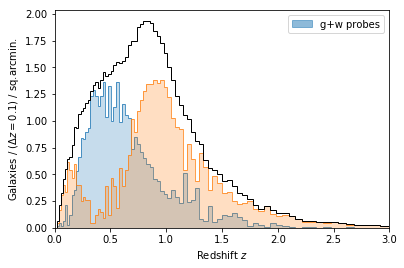

In [41]:
plot_dndz(dndz_bin, init_data[0])

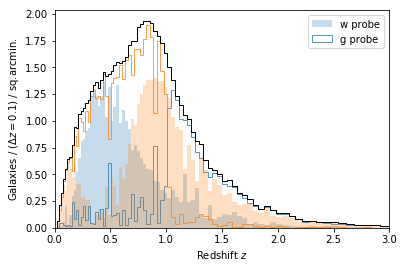

In [40]:
plot_dndz(dndz_bin2, init_data[0])